The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:
- timestamp: the beginning of the 15-minute window for that row of data
- boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
- alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
- day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
- temperature: temperature at that time in degrees F
- hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
- month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("capmetro_UT.csv")
df[:5]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [4]:
# Converts the timestamp column to a datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Forms a new column representing the total net ridership.
df['total_net_ridership'] = df['boarding'] - df['alighting']

When examining the data for possible insights, I found it necessary to first convert the "timestamp" column to a datetime type. That way, it becomes easier to construct plots and generate numerically-based insights regarding the more specific areas of the time a Capital Metro bus runs (i.e., minutes and seconds). Also, I decided to create a new column called "total_net_ridership" prior to the production of any plots. This was done by caluclating the difference between how many people embark and how many people alight the bus at each Capital Metro bus stop during any given 15-minute period. These resulting values are stored in the "total_net_ridership" column. To me, it is more intriguing to see the impact of this metric in relation to potential patterns, as opposed to looking at boarding and alighting separately.

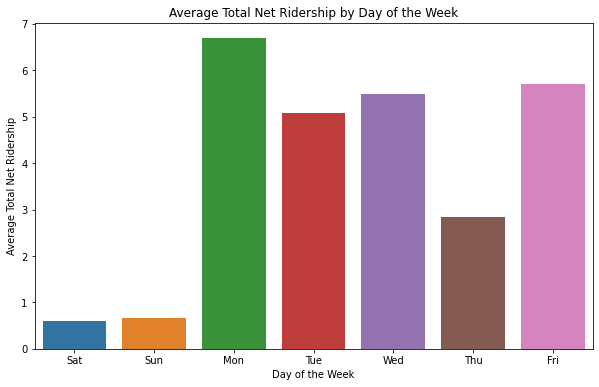

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total_net_ridership', data=df, ci=None)
plt.title('Average Total Net Ridership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Net Ridership')
plt.show()

The bar plot above examines the average total net ridership of Capital Metro buses in the UT area, based on the day of the week (Saturday - Friday). As anticipated, there is a positive average net ridership across every day of the week, as many more people board the buses during the semester. Since each school on campus is at a different location relative to UT metro stops, it makes sense that people leave the bus at different stops, despite having boarded from the same initial stop. Furthermore, it is evident that the weekdays (Monday - Friday) have a significantly greater average total net ridership than the weekends. Since many underclassmen have classes nearly every day from Monday through Friday, a larger quantity of them likely need to ride on the buses, especially if they live off-campus. Otherwise, they might miss out on critical knowledge pertaining to what they are studying for their degrees. Lastly, the peaks in net ridership on Monday and Friday align with being the beginning and the end of the school week in a semester, which are often the days that students typically decide to attend their classes. That is, of course, assuming that they do skip; other students who are more studious might not behave in a similar fashion. 

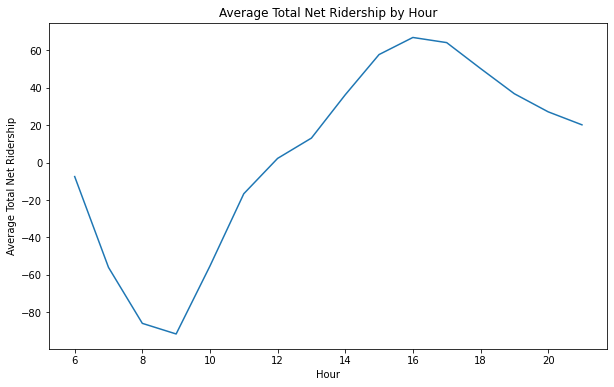

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='total_net_ridership', data=df, ci=None)
plt.title('Average Total Net Ridership by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total Net Ridership')
plt.show()

The line graph above represents the average total net ridership of Capital Metro buses in the UT area based on the hour of the day. Here, any hours greater than 12 (13 or above) are considered to be "PM" times, such that hour 13 is 1 PM, hour 14 is 2 PM, and so on. From this figure, it can be observed that there is generally more net ridership during the morning hours with regards to stops around the UT campus, with a peak at aroound 9 AM. This can possibly be explained by the fact that many students, especially undergraduates, have full schedules with classes starting in the morning. As such, a greater quantity of them are likely to alight at the UT Metro stops near campus, as indicated by the negative average total net ridership during this time. During the middle of the day, it seems that there is the least singifcant amount of net ridership, as roughly the same amount of people board the bus as leave the bus at UT Austin Capital Metro stops. However, later on in the afternoon, ridership experiences another peak at around 4 PM. This time, it is with regards to people boarding the bus at the stops close to campus. Similar to the peak in alighting in the morning, many undergraduates opt to select classes that finish by the late afternoon, so a higher number of them would require some form of transportation in order to reach their off-campus residences.

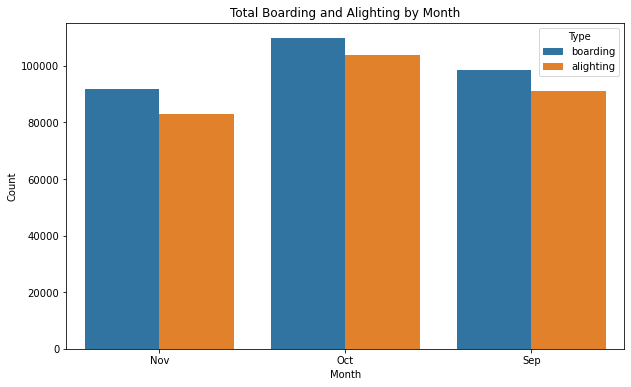

In [9]:
df_grouped_month = df.groupby('month')[['boarding', 'alighting']].sum().reset_index()
df_grouped_month = pd.melt(df_grouped_month, id_vars='month', value_vars=['boarding', 'alighting'], var_name='Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Count', hue='Type', data=df_grouped_month)
plt.title('Total Boarding and Alighting by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In order to generate the data for the bar plot above, I created a new dataframe using the groupby() function in Python, which grouped both boarding and alighting by month. Here, count represents the total number of people either boarding or alighting the bus for the month. Interestingly, there was only data from September through November in this data set. This could potentially be due to the fact that, although the fall semester starts in August and ends in December, only a portion of these two months actually comprise part of the semester. The entire months of September, October, and November are included, though, and if the data measures Capital Metro bus stops near UT, it makes sense to focus on months where there is guaranteed to be students riding the buses every day. With regards to the above figure, it appears that for every month, the number of people boarding the buses exceeds the number of people leaving the buses at stops near UT. This could be because students often prefer classes in the morning to classes at night, leading to greater spikes in students boarding the bus in the late afternoon for each month. Of the months presented above, October shows the overall highest net ridership. This could possibly be due to October being the month where a majority of work in classes gets assigned, leading to an increased demand by students as it concerns riding the Capital Metro bus. It is the most stressful period of the fall semester, and one where students believe they need to attend all classes if able.

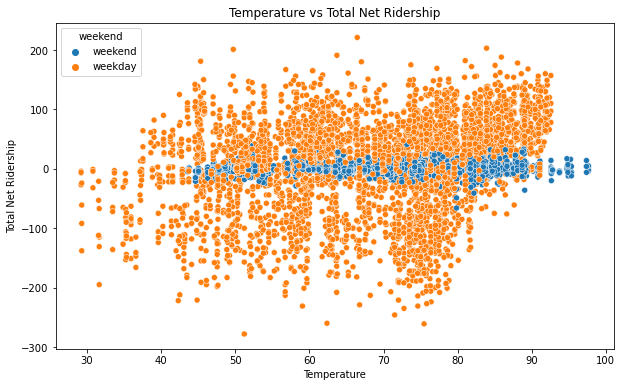

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='total_net_ridership', hue='weekend', data=df)
plt.title('Temperature vs Total Net Ridership')
plt.xlabel('Temperature')
plt.ylabel('Total Net Ridership')
plt.show()

The above scatter plot examines the potential relationship between temperature and total net ridership as it relates to Capital Metro stops near campus. The orange dots represent data gathered on weekdays, whereas the blue dots represent data gathered on weekends. Perhaps the biggest pattern prevalent from the figure is that there seems to be a slight correlation between lower temperatures and higher total net ridership, as it concerns alighting the bus. This is primarily the case among weekdays; for weekends, there does not seem to be any correlation. One explanation for this trend could again relate to students living off-campus, especially those within fairly close proximity to campus. In warmer weather, students who live less than a mile away might opt to mainly walk to UT, as there is not that great of a time difference when it comes to arriving for classes on campus. However, as temperatures fall, it becomes much less desirable for them to make their usual trek, especially in the mornings, where the temperatures are the coolest of the day. As such, it makes more sense for students to take the nearest bus from their place of residence to UT, leading to an increased number of people alighting from the bus on stops near campus. In a place like Austin, people would rather be too warm than be too cold, and the above figure suggests this notion.